<a href="https://colab.research.google.com/github/SalmaSherif7070/Logistic-Regression-from-scratch-/blob/main/A5_%7C_Logistic_Regression_from_scratch_%7C_Salma_Sherif_2022200622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
!pip install --quiet kaggle
!pip3 install --quiet neptune-client==1.2.0
!pip install --quiet opendatasets

In [ ]:
import opendatasets as od
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
with open('kaggle.json', 'w') as f:
        json.dump({"username":"salmasherif202200622","key":"229b193e95c2e1ca70b462cf1507b94c"}, f)

# Reading

In [ ]:
od.download('https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility/data?select=heart.csv&authuser=0')

Skipping, found downloaded files in "./health-care-data-set-on-heart-attack-possibility" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/health-care-data-set-on-heart-attack-possibility/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data cleaning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print("Before droping duplicates: ", df.duplicated().sum())
df = df.drop_duplicates()
print("After droping duplicates: ", df.duplicated().sum())

Before droping duplicates:  1
After droping duplicates:  0


# Model Train

Equation 1

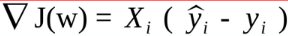

Equation 2

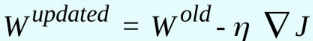

In [ ]:
# Prepare random weights + b in consideration
W = np.random.rand(1, X_train.shape[1] + 1)
W

array([[0.73783063, 0.87287638, 0.57128636, 0.21682562, 0.42261715,
        0.00600666, 0.57546499, 0.55840803, 0.60872289, 0.63208052,
        0.84072878, 0.88434564, 0.29625467, 0.36318419]])

In [ ]:
# Agumnet X_train
ones_column = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, ones_column))
X_train.shape

(242, 14)

In [ ]:
# Sigmoid prediction fun
def get_y_pred(W, X):
  return 1 / (1 + np.exp( -np.dot(W, X.T)))

In [ ]:
LR = 0.1
ephocs = 1000
for j in range(ephocs):
  # iterate for more than one ephocs times
  Delta_J_W = np.zeros(W.shape)
  for i in range(X_train.shape[0]):
    y_pred = get_y_pred(W, X_train[i])
    error = y_pred - y_train[i]
    Delta_J_W += X_train[i] * error  # Equation 1
  W -= LR * Delta_J_W / X_train.shape[0]  # Equation 2

# Evaluation

In [ ]:
ones_column_test = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, ones_column_test))

y_pred_prob = get_y_pred(W, X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy = np.mean(y_pred[0] == y_test)
print(f'Accuracy: {accuracy * 100} %')

Accuracy: 88.52459016393442 %


In [ ]:
precision = precision_score(y_test, y_pred[0], average='macro')
recall = recall_score(y_test, y_pred[0], average='macro')
f1_score_val = f1_score(y_test, y_pred[0], average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_val)

Precision: 0.8858225108225108
Recall: 0.8841594827586207
F1 Score: 0.8847503373819163


# Discussion

**Data cleaning:**  
*   There we one duplicate

**Insights:**  
*   in some point increasing num of ephocs does not effect the model
*   The best hiper parameters I reached is what I used for LR and epochs
* when icreasing the epochs so much the model overfits
